In [ ]:
library(tidyverse)
library(lubridate)

In [ ]:
gm <- read.csv("/content/gm.us.txt")
fcau <- read.csv("/content/fcau.us.txt")
ford <- read.csv("/content/ford.us.txt")

In [ ]:
install.packages("devtools") 
library(devtools)
install_github("ProcessMiner/nlcor")
library(nlcor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘httpuv’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘shiny’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘miniUI’ had non-zero exit status”
Warning message in install.packages("devtoo

isoband (0.2.6 -> 0.2.7) [CRAN]
ggplot2 (3.4.1 -> 3.4.2) [CRAN]


Installing 2 packages: isoband, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp1A8oGu/remotesd732313921/ProcessMiner-nlcor-92d4aa3/DESCRIPTION’ ... OK
* preparing ‘nlcor’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘nlcor_2.3.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
crime <- read.csv("/content/DPD__Reported_Major_Crimes__2011-2014.csv")

In [ ]:
gm_2014 <- gm %>% 
  mutate(stock = "GM") %>%
  filter(year(Date) == 2014) %>%
  select(Date, Close)
fcau_2014 <- fcau %>% 
  mutate(stock = "FCAU") %>%
  filter(year(Date) == 2014) %>%
  select(Date, Close)
ford_2014 <- ford %>% 
  mutate(stock = "FORD") %>%
  filter(year(Date) == 2014) %>%
  select(Date, Close)

avg_vals <- gm_2014 %>%
  left_join(fcau_2014, by = 'Date') %>%
  left_join(ford_2014, by = 'Date') %>%
  rename(GM = Close.x) %>%
  rename(FCAU = Close.y) %>%
  rename(Ford = Close) %>%
  mutate(Avg = (GM+FCAU+Ford)/3) %>%
  mutate(Date = ymd(Date)) %>% 
  mutate(Avg = (Avg - mean(Avg, na.rm = T))/sd(Avg, na.rm = T)) %>%
  rename(avg_norm = Avg) %>%
  na.omit()

stock_graph <- avg_vals %>%
  ggplot(aes(x=Date, y = Avg)) +
  geom_line()

In [ ]:
gm %>%
  ggplot() +
  geom_histogram(aes(x=Close))
fcau %>%
  ggplot() +
  geom_histogram(aes(x=Close))
ford %>%
  ggplot() +
  geom_histogram(aes(x=Close))

In [ ]:
crime1 <- crime %>%
  select(INCIDENTDATE, HOUR, LOCATION) %>%
  mutate(Date = mdy_hms(INCIDENTDATE)) %>%
  group_by(Date) %>%
  summarise(count = n()) %>%
  filter(year(Date) == 2014) %>%
  mutate(count = (count - mean(count))/sd(count))
crime_graph <- crime1 %>%
  ggplot(aes(x = Date, y= count)) +
  geom_line() +
  ggtitle("Crime in 2014")

In [ ]:
combined <- avg_vals %>% 
  left_join(crime1, by = 'Date')

In [ ]:
colors <- c("avg_norm" = "blue", "count" = "darkred")

comb_graph <- combined %>%
  ggplot(aes(x = Date)) +
  geom_line(aes(y = avg_norm, color = 'avg_norm')) +
  geom_line(aes(y = count, color = 'count')) +
  ggtitle("Normalized Relationship between Crime Count and Major employer Performance") +
  ylab('Normalized Values') + 
  scale_color_manual(values = colors, labels = c('Crime', 'Employer Performance')) +
  labs(color = "Data Type") +
  scale_fill_discrete(labels=c('High', 'Low')) 


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


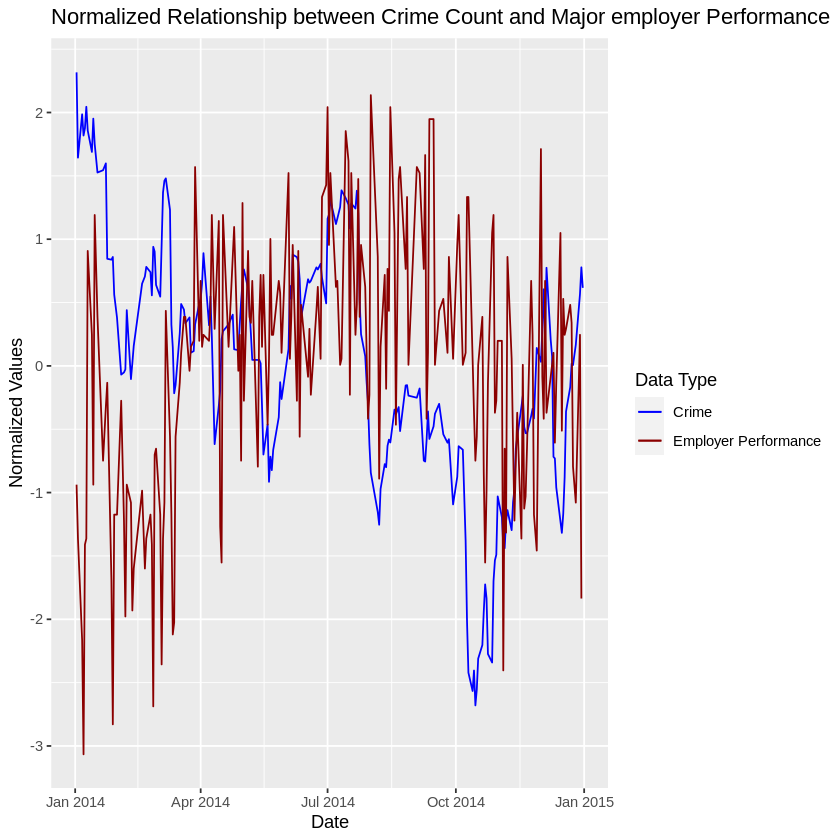

In [ ]:
comb_graph

In [ ]:
#combined %>% print
#fail to reject null, alternative not likely
#p-value = 0.2268
cor.test(combined$avg_norm, combined$count, method = "spearman")
comb_graph

Warning message in cor.test.default(combined$avg_norm, combined$count, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  combined$avg_norm and combined$count
S = 1793448, p-value = 0.2268
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0827644 
